In [0]:
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 5)  

In [2]:
x = np.array([[1, 40, 21, 24, 14],
     [24, 33, 13, 22, 19],
     [11, 36, 25, 8, 21],
     [9, 62, 29, 35, 17],
     [20, 26, 29, 25, 13],
     [7, 66, 29, 30, 17],
     [4, 29, 11, 27, 16],
     [1, 57, 13, 20, 24],
     [10, 31, 23, 21, 21],
     [16, 40, 34, 32, 17],
     [18, 59, 13, 27, 28]])
y = np.array([172, 95, 168, 85, 167, 175, 142, 109, 138, 131, 113])
x = np.insert(x, 0, 1, axis=1)
x          

array([[ 1,  1, 40, 21, 24, 14],
       [ 1, 24, 33, 13, 22, 19],
       [ 1, 11, 36, 25,  8, 21],
       [ 1,  9, 62, 29, 35, 17],
       [ 1, 20, 26, 29, 25, 13],
       [ 1,  7, 66, 29, 30, 17],
       [ 1,  4, 29, 11, 27, 16],
       [ 1,  1, 57, 13, 20, 24],
       [ 1, 10, 31, 23, 21, 21],
       [ 1, 16, 40, 34, 32, 17],
       [ 1, 18, 59, 13, 27, 28]])

**Аналитический метод**

In [0]:
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
w = np.dot(np.linalg.pinv(x), y)
w

array([ 2.32774094e+02, -1.00956848e+00, -3.37794925e-02,  1.23548287e+00,
       -2.24244579e+00, -2.97579684e+00])

Проверка результата


In [5]:
[2.32774094e+02 * x[i][0] + -1.00956848e+00 * x[i][1] + -3.37794925e-02 * x[i][2] + 1.23548287e+00 * x[i][3] + -2.24244579e+00 * x[i][4] + -2.97579684e+00 * x[i][5] for i in range(len(x))]

[160.87863137,
 117.6170571975,
 170.90855077999996,
 128.34850344499998,
 152.78695715499995,
 141.444751385,
 133.1877405975,
 129.63233179749997,
 140.46425571249995,
 134.92942463999998,
 84.8018007625]

**Градиентный спуск**

In [0]:
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
h = 10**(-5)
e = 10**(-3)
rss = []

In [0]:
def grad_w():
    return 2*sum(np.array([x[i]*(sum(w*x[i]) - y[i]) for i in range(len(x))]))
def func():
    return w - h * grad_w()

In [8]:
rss.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
while abs(np.array([w[0]]) - np.array([func()[0]])) > e:
    w = func()
    rss.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
w, rss[-1]

(array([ 0.35422181, -0.33035571, -0.1907557 ,  3.2965269 ,  0.71916507,
         2.83291281]), 13998.803118059202)

Text(0.5, 1.0, 'Градиентный спуск')

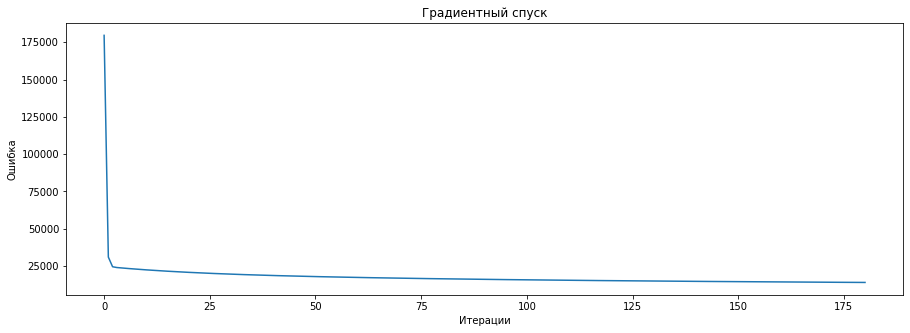

In [0]:
plt.plot(range(len(rss)), rss)

plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск')

Проверка результата

In [0]:
[0.19243839 * x[i][0] + 0.22667327 * x[i][1] + -0.10497379 * x[i][2] + 2.56410732 * x[i][3] + 1.30026294 * x[i][4] + 1.19639151 * x[i][5] for i in range(len(x))]

[98.02220548000001,
 86.83908033000002,
 98.53579615,
 135.93109369,
 124.41536066,
 128.55653729000002,
 80.50943562,
 82.48765583,
 110.60919541000001,
 148.74697774,
 100.01856046]

**Стохастический спуск**

In [0]:
rss2 = []
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
h = 10**(-5)
e = 10**(-5)
i = 0

In [0]:
def st_grad_w():
    return 2*(x[i]*(sum(w*x[i]) - y[i]))
def st_func():
    return w - h*st_grad_w()

In [0]:
rss2.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
while abs(np.array([w[0]]) - np.array([st_func()[0]])) > e:
    w = st_func()
    rss2.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
    i = np.random.randint(0, len(x))
w, rss2[-1]

(array([0.15430568, 0.51516077, 1.01468744, 1.29200583, 0.71508591,
        0.9002432 ]), 24349.73408886577)

Text(0.5, 1.0, 'Стохастический спуск')

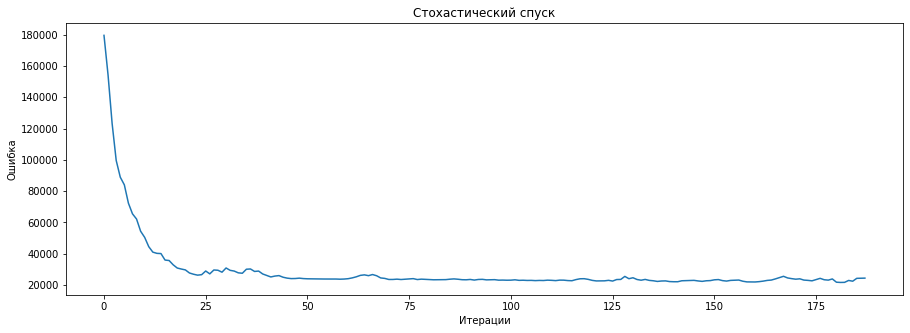

In [0]:
plt.plot(range(len(rss2)), rss2)

plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('Стохастический спуск')

Проверка результата

In [0]:
[0.13707613 * x[i][0] + 0.48222968 * x[i][1] + 1.25173358 * x[i][2] + 0.94899542 * x[i][3] + 0.73164352 * x[i][4] + 0.73475376 * x[i][5] for i in range(len(x))]

[98.46354994999999,
 95.41121593000001,
 95.51187411,
 147.70382951,
 97.69049687,
 148.08808686999998,
 80.31565349000002,
 116.57202097000001,
 96.38435145000001,
 126.09134505,
 135.33391237]

In [0]:
x = np.array([[1, 40, 21, 24, 14],
     [24, 33, 13, 22, 19],
     [11, 36, 25, 8, 21],
     [9, 62, 29, 35, 17],
     [20, 26, 29, 25, 13],
     [7, 66, 29, 30, 17],
     [4, 29, 11, 27, 16],
     [1, 57, 13, 20, 24],
     [10, 31, 23, 21, 21],
     [16, 40, 34, 32, 17],
     [18, 59, 13, 27, 28]])
y = np.array([172, 95, 168, 85, 167, 175, 142, 109, 138, 131, 113])
x = np.insert(x, 0, 1, axis=1)
x          

array([[ 1,  1, 40, 21, 24, 14],
       [ 1, 24, 33, 13, 22, 19],
       [ 1, 11, 36, 25,  8, 21],
       [ 1,  9, 62, 29, 35, 17],
       [ 1, 20, 26, 29, 25, 13],
       [ 1,  7, 66, 29, 30, 17],
       [ 1,  4, 29, 11, 27, 16],
       [ 1,  1, 57, 13, 20, 24],
       [ 1, 10, 31, 23, 21, 21],
       [ 1, 16, 40, 34, 32, 17],
       [ 1, 18, 59, 13, 27, 28]])

In [0]:
x_feature0 = np.array(list(map(lambda x: x[0], x))) [:, np.newaxis]
x_feature1 = np.array(list(map(lambda x: x[1], x))) [:, np.newaxis]
x_feature2 = np.array(list(map(lambda x: x[2], x))) [:, np.newaxis]
x_feature3 = np.array(list(map(lambda x: x[3], x))) [:, np.newaxis]
x_feature4 = np.array(list(map(lambda x: x[4], x))) [:, np.newaxis]
x_feature5 = np.array(list(map(lambda x: x[5], x))) [:, np.newaxis]

In [0]:
column_X0= np.linspace(x_feature0.min(), x_feature0.max(),12)
column_X1 = np.linspace(x_feature1.min(), x_feature1.max(),12)
column_X2= np.linspace(x_feature2.min(), x_feature2.max(),12)
column_X3 = np.linspace(x_feature3.min(), x_feature3.max(),12)
column_X4 = np.linspace(x_feature4.min(), x_feature4.max(),12)
column_X5 = np.linspace(x_feature5.min(), x_feature5.max(),12)
X_ = np.stack((column_X0, column_X1, column_X2, column_X3, column_X4, column_X5), axis=1)
X_

array([[ 1.        ,  1.        , 26.        , 11.        ,  8.        ,
        13.        ],
       [ 1.        ,  3.09090909, 29.63636364, 13.09090909, 10.45454545,
        14.36363636],
       [ 1.        ,  5.18181818, 33.27272727, 15.18181818, 12.90909091,
        15.72727273],
       [ 1.        ,  7.27272727, 36.90909091, 17.27272727, 15.36363636,
        17.09090909],
       [ 1.        ,  9.36363636, 40.54545455, 19.36363636, 17.81818182,
        18.45454545],
       [ 1.        , 11.45454545, 44.18181818, 21.45454545, 20.27272727,
        19.81818182],
       [ 1.        , 13.54545455, 47.81818182, 23.54545455, 22.72727273,
        21.18181818],
       [ 1.        , 15.63636364, 51.45454545, 25.63636364, 25.18181818,
        22.54545455],
       [ 1.        , 17.72727273, 55.09090909, 27.72727273, 27.63636364,
        23.90909091],
       [ 1.        , 19.81818182, 58.72727273, 29.81818182, 30.09090909,
        25.27272727],
       [ 1.        , 21.90909091, 62.36363636, 31.

In [0]:
lr = linear_model.LinearRegression()
lr.fit(x, y)
Y_predict = lr.predict(X_)

In [0]:
lr.coef_

array([ 0.        , -1.00956848, -0.03377949,  1.23548287, -2.24244579,
       -2.97579684])

In [0]:
lr.intercept_ 

232.7740936078372

In [0]:
lr.score(x,y)

0.503144094751405